## Introduction

WHO announced that cardiovascular diseases is the top one killer over the world. There are seventeen million people died from it every year, especially heart disease. Prevention is better than cure. If we can evaluate the risk of every patient who probably has heart disease, that is, not only patients but also everyone can do something earlier to keep illness away.

This dataset contains thirteen features, as below:

- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, - Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

## Task to be Performed

- Import required libraries
- Read the dataset and perform necessary changes
- Generate a ProfileReport using Pandas Profiling
- Perform exploratory data analysis over the data
- Process the data for various classification
- Perform hyperparameter tuning to get the best accuracy
- Pick the model with better accuracy and export the model

## Importing Libraries

In [1]:
# # Install the libraries if required
# !pip install pandas-profiling
# !pip install plotly
# !pip install tabulate

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly 
import plotly.express as px
import matplotlib as mpl
mpl.style.use(['ggplot'])
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Pastikan menggunakan versi yang sama untuk yang terbaik
print('Pandas: ',pd.__version__)
print('Numpy: ',np.__version__)
print('Plotly: ',plotly.__version__)
print('Matplotlib: ',mpl.__version__)
print('Seaborn: ',sns.__version__)

Pandas:  1.3.4
Numpy:  1.21.4
Plotly:  4.4.1
Matplotlib:  3.2.2
Seaborn:  0.11.2


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Reading Dataset

In [5]:
data = pd.read_csv('/content/gdrive/MyDrive/PraKerja/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Understanding the data

In [7]:
# Generate Report menggunakan Pandas Profiling
out = ProfileReport(data)
out.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Simpan report
out.to_file('Heart Disease.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Bisa kita lihat dari pandas reporting, bahwa data kita memiliki duplikasi 1 row dan tidak ada data missing, Jadi kita bisa langsung saja membuangnya.

In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
# Kita cek lagi apakah duplikatnya sudah dihilangkan
data.duplicated().sum()

0

In [12]:
# keeping a copy of data
orig_data = data.copy()

## Exploratory Data Analysis

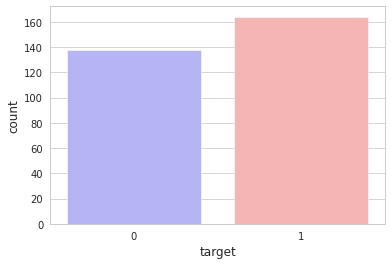

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = data, palette = 'bwr')
plt.show()

### Gender Distribution

In [14]:
pie_data = data[data['target'] == 1].groupby(['sex'], as_index=False)['target'].count()

In [15]:
pie_data['sex'] = pie_data['sex'].replace([0,1],['Female','Male'])

In [16]:
fig = px.pie(pie_data, values='target', names='sex', title='Diagnosa yang memiliki penyakit jantung berdasarkan Gender', color_discrete_sequence = px.colors.sequential.Aggrnyl)
fig.show()

Data ini menunjukkan bahwa Laki-Laki lebih banyak yang punya penyakit jantung dibandingkan Perempuan. Sekarang mari kita lihat distribution secara keseluruhan. Dan kalau perlu lihat apakah memiliki outlier atau tidak.

### Age Distribution

In [17]:
px.histogram(data,
             x='age',
             color_discrete_sequence = px.colors.sequential.Aggrnyl,
             hover_data = data.columns, 
             marginal = "box",
             color = 'target')

Visualisasi diatas menunjukkan distribusi umur dengan keseluruhan dari data target yang memiliki penyakit jantung atau tidak. Berdasarkan visualisasinya, grup umur 40-65 memiliki nilai terbesar diatas > 10 yang didiagnosa punya penyakit jantung. 

In [18]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

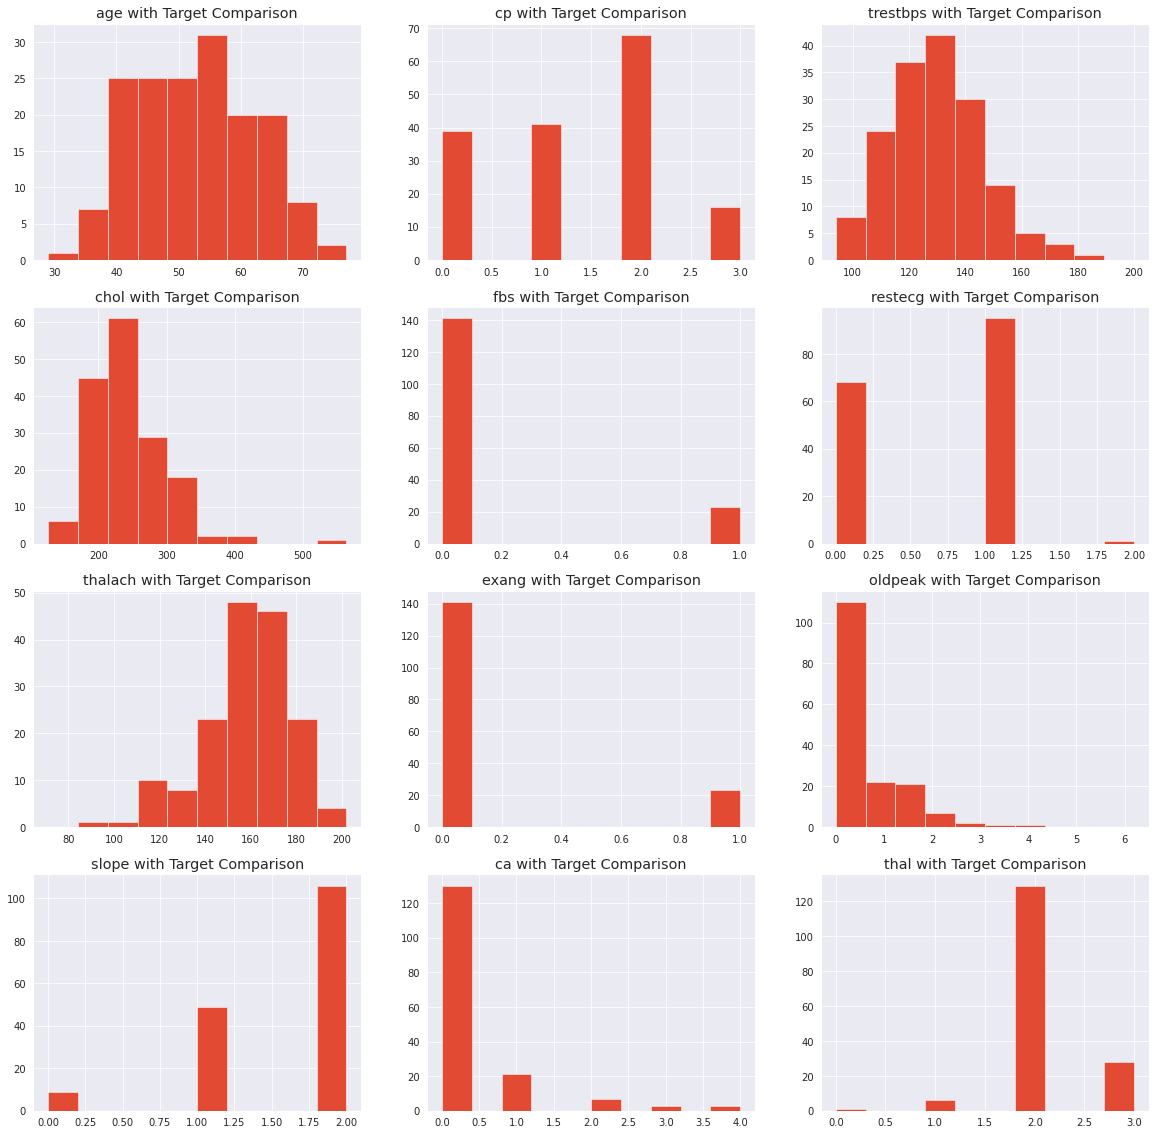

In [19]:
list_cols = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
sns.set_style('darkgrid')

fig, axs = plt.subplots(4,3, figsize = (20,20))

for ax, i in zip(axs.flat, list_cols):
    ax.hist(data[i], weights = data['target'])
    ax.set_title(i + ' with Target Comparison')

plt.show()

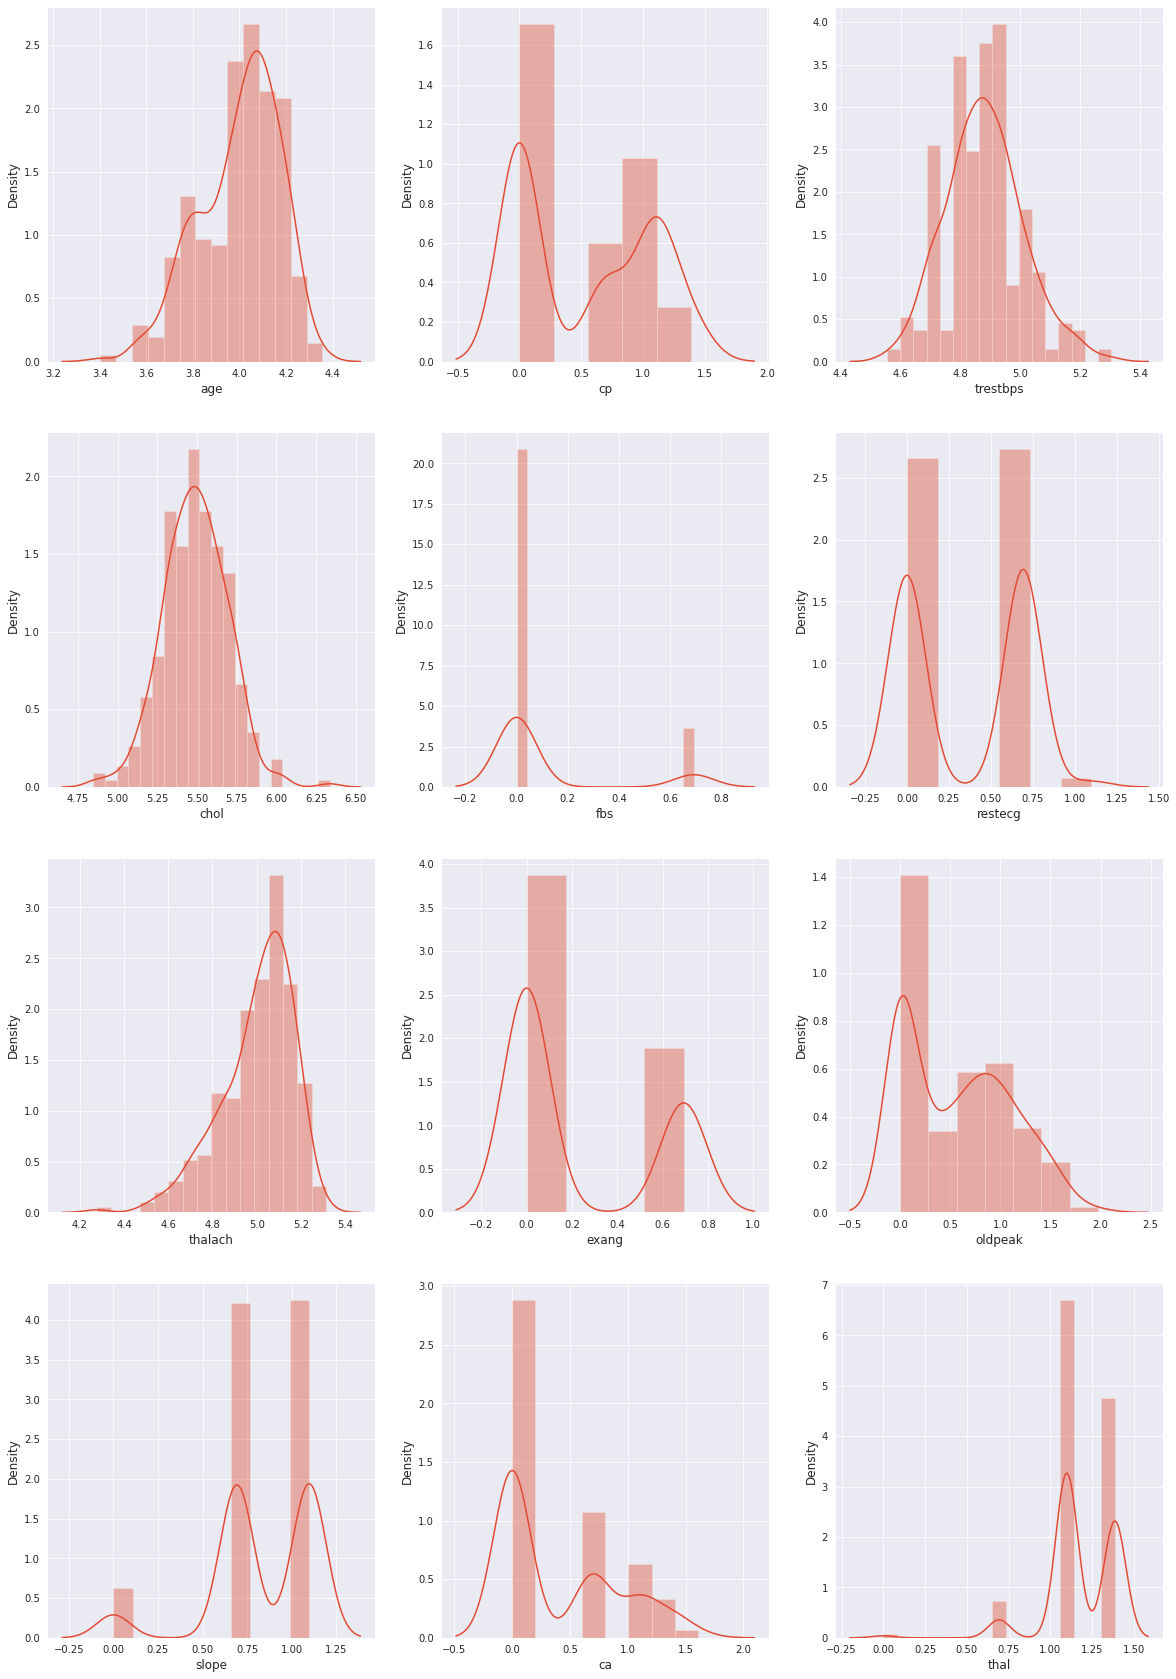

In [20]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(4,3, figsize = (20,30))

for ax, i in zip(axs.flat, list_cols):
    sns.distplot(np.log1p(data[i]), kde = True, ax = ax)

plt.show()

Terdapat data yang terbilang memiliki normal distribusi, dengan mengabaikan categorical data

## Feature Selection

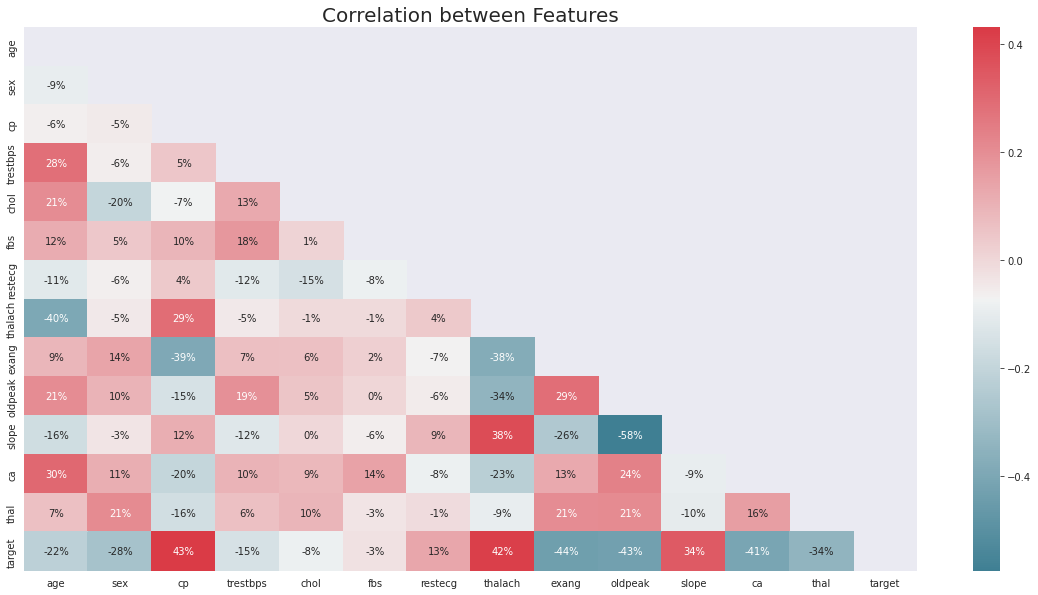

In [21]:
# Mencari korelasi diantara semua features menggunakan pandas corr() dan seaborn heatmap
plt.figure(figsize=(20,10))
plt.title('Correlation between Features', fontsize=20)
colormap = sns.diverging_palette(220, 10, as_cmap = True)
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, fmt = ".0%", cbar = True, cmap=colormap, mask=mask);

Dari visualisasi correlation menggunakan heatmap diatas, terdapat negatif correlation dan strong correlation dimiliki oleh pasien yang memiliki Chest Pain dan memiliki maximum heart rate. Mari kita lihat lagi korelasinya diantara keduanya

In [22]:
px.box(data,x='target',y='thalach',color_discrete_sequence=px.colors.sequential.Aggrnyl, title='Korelasi Maximum Heart Rate dengan Target')

Pasien yang didiagnosa penyakit jantung memang memiliki rata-rata resiko detak jantung lebih tinggi yang mediannya berada diangka 161.

In [23]:
px.histogram(data, x="target", color="cp",barmode="group",color_discrete_sequence=px.colors.sequential.Aggrnyl, title ='Korelasi Chest Pain dengan Target') 

Untuk korelasi antara Chest Pain dengan Target, menunjukkan atypical angine memiliki jumlah terbanyak saat pasien didiagnosa penyakit jantung. Atypical angina ini merupakan pasien dengan gangguan panik yang mengalami nyeri dada sering kali dianggap mengalami nyeri dada yang tidak berhubungan dengan jantung. Source(https://www.harringtonhospital.org/typical-and-atypical-angina-what-to-look-for/)

## Data Processing

In [24]:
# getting the processed data
mutated_data = data.copy()

Setelah menjelajahi dataset, saya mengamati bahwa saya perlu mengubah beberapa variabel kategori menjadi variabel dummy dan menskalakan semua nilai sebelum melatih model Machine Learning. Pertama, saya akan menggunakan metode get_dummies untuk membuat kolom dummy untuk variabel kategori.

In [25]:
df = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Scale data untuk menghandle outlier yang kita miliki
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [27]:
X = df.drop(['target'], axis = 1)
y = df['target']

print(X.shape, y.shape)

(302, 30) (302,)


In [28]:
# Membagi data dengan 80% data train dan 20% data test untuk mendapatkan hasil terbaik
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(241, 30) (61, 30) (241,) (61,)


## Modeling

In [29]:
# Import ML model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import metrics untuk melihat keakuratan model ML
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, plot_roc_curve

# Import untuk tuning hyperparameter dan cross validation untuk melihat balance fit 
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

# Untuk melihat tabulasi data hasil scoring
from tabulate import tabulate

In [30]:
all_models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Support Vector Machine", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors = 12))
]

# Memvalidasi dengan banyak eksperimen percobaan, yaitu 5 kali validasi silang
skfold = StratifiedKFold(5, shuffle=True, random_state=1)

# n_job digunakan untuk mempercepat pemrosesan data dengan memparalelkan CPU
unsorted_scores = [(name, cross_val_score(model, X_train, y_train, cv = skfold, n_jobs = -1).mean()) for name, model in all_models]
scores = sorted(unsorted_scores, key=lambda x: -x[1])

print(tabulate(scores, floatfmt=".4f", headers=("model", 'score')))

model                     score
----------------------  -------
Logistic Regression      0.8462
Random Forest            0.8338
Support Vector Machine   0.8337
K-Nearest Neighbors      0.8252
Naive Bayes              0.7585
Decision Tree            0.7342


**Observation**:
  Dari semua model ML dengan default parameter yang saya coba training, tingkat akurasi tertinggi adalah Logistic Regression. Lalu, kita bisa coba melihat reportingnya lebih jelas lagi dan plot confussion matrix, karena kita melihat bukan hanya scoring tertingginya saja tetapi actual prediction dengan tingkat False Negative terendah.


In [31]:
def model(algorithm, X_train, X_test, y_train, y_test):
    model = algorithm
    alg_model = model.fit(X_train, y_train)
    global y_pred
    y_pred = alg_model.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    report = classification_report(y_test, y_pred)

    print('The accuracy of the classifier is {0}%'.format(accuracy))
    print('\nThe calculated RMSE is {0}'.format(rmse))
    print('\nThe classification report is as follows:\n')
    print(report)

    print('\n')

    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, fmt= '', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.title('Accuracy: {0}'.format(round(accuracy, 2)))
    plt.show()


Test to model Logistic Regression ...
The accuracy of the classifier is 88.52%

The calculated RMSE is 0.3387537429470791

The classification report is as follows:

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61





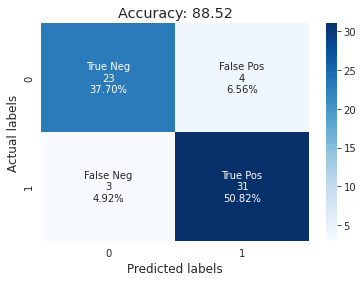


Test to model Random Forest ...
The accuracy of the classifier is 88.52%

The calculated RMSE is 0.3387537429470791

The classification report is as follows:

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61





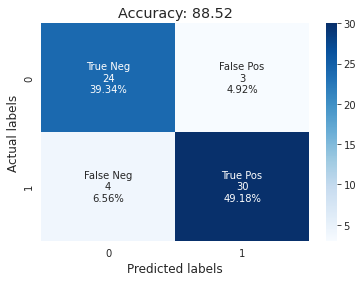


Test to model Naive Bayes ...
The accuracy of the classifier is 88.52%

The calculated RMSE is 0.3387537429470791

The classification report is as follows:

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61





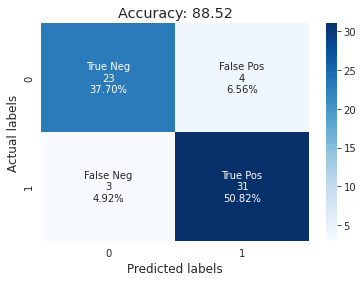


Test to model Support Vector Machine ...
The accuracy of the classifier is 85.25%

The calculated RMSE is 0.3841106397986879

The classification report is as follows:

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.90      0.82      0.86        34

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61





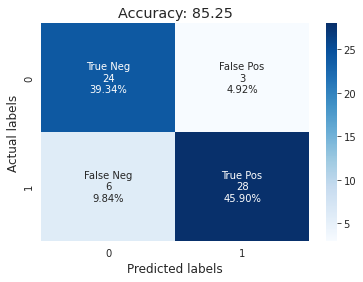


Test to model Decision Tree ...
The accuracy of the classifier is 73.77%

The calculated RMSE is 0.5121475197315839

The classification report is as follows:

              precision    recall  f1-score   support

           0       0.68      0.78      0.72        27
           1       0.80      0.71      0.75        34

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61





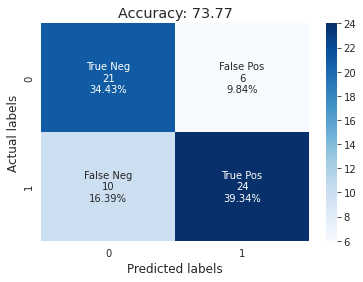


Test to model K-Nearest Neighbors ...
The accuracy of the classifier is 86.89%

The calculated RMSE is 0.3621429841700741

The classification report is as follows:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61





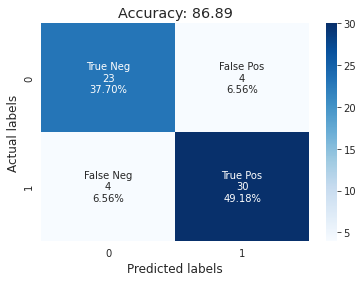

In [32]:
for i, j in zip(all_models, range(1, len(all_models)+1)):
    print('\nTest to model {} ...'.format(i[0]))
    model(i[1], X_train, X_test, y_train, y_test)

**Obervation**:
  Setelah saya melihat confussion matrixnya terlihat jelas dan ada sedikit berbeda dari hasil cross validation, yaitu nilai akurasi Logistic Regression dan Naive Bayes memiliki nilai yang sama. Tetapi untuk Naive Bayes memiliki score cross validasi dibawah 80, ini menyatakan bahwa setelah melakukan banyak eksperimen validasi data training, naive bayes ini rendah. Maka itu coba kita lihat visualisasi dari ROC AUC dari kedua jenis ML ini.

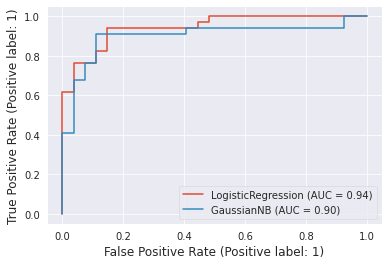

In [33]:
lr = LogisticRegression().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

disp = plot_roc_curve(lr, X_test, y_test)
plot_roc_curve(nb, X_test, y_test, ax = disp.ax_);

**Obervasi**: Hasil simpel dari visualisasi ROC AUC ini menjelaskan yang sebenarnya, bahwa Logistic Regression memiliki nilai treshold dan AUC lebih baik dibanding Naive Bayes. Logistic Regression saya pilih untuk mencoba ke tuning parameter, karena untuk setiap titik dia memiliki TP lebih tinggi dan atau FP lebih rendah.

## Hyperparameter Tuning

Hyperparameter tuning saya eksperimentasi untuk melihat apakah model yang kita buat bisa memiliki score tertinggi lagi dan me-reduce False Negative

In [34]:
# Melihat parameter dari suatu ML model
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [35]:
param = {'C': [0.001,.009,0.01,.09,1,5,10,25],
         'penalty': ['l1', 'l2'],
         'class_weight': ['balanced', 'none']
         }

In [36]:
skfold = StratifiedKFold(5, shuffle=True, random_state=1)

In [37]:
clf = GridSearchCV(lr, param, cv = skfold, n_jobs = -1, scoring = 'recall')
clf.fit(X_train, y_train)
print('Parameter terbaik yang akan dipilih: ',clf.best_params_)
print('Score yang didapat dari tuning parameter: ',clf.best_score_)

Parameter terbaik yang akan dipilih:  {'C': 0.001, 'class_weight': 'none', 'penalty': 'l2'}
Score yang didapat dari tuning parameter:  0.9846153846153847


**Observation**: Model yang saya tuning menghasilkan score Recall tertinggi yaitu, mereduce nilai False Negative dengan angka mencapai 98%. Tetapi dari sini akan mengorbankan nilai lainnya, dimana nilai False Positive menjadi tinggi. Ini mengakibatkan jika pasien yang benar-benar negatif penyakit jantung akan dikategorikan yang menjadi positif, namun sisi baiknya, bahwa pasien yg benar-benar positif sedikit dikategorikan menjadi negatif.

In [38]:
# Mari kita lihat hasil prediksinya
pred = clf.predict(X_test)

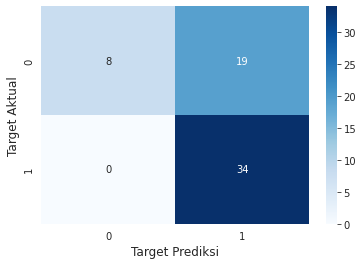

In [39]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('Target Prediksi')
plt.ylabel('Target Aktual')
plt.show()

**Konklusi**:
Setelah mencoba berbagai banyak model Machine Learning, saya memilih Logistic Regression dengan tingkat Akurasi dan score ROC AUC yang tinggi dan melakukan tuning, maka didapatkan dengan tujuan diawal, bahwa ingin mereduc False Negatif, dimana pasien dengan penyakit Jantung benar-benar dikategorikan Positif bukan malah Negatif. Namun dari parameter yang kita coba cari akan menimbulkan juga berbagai ketidak konsisten.

**Solusi**: Gunakan berbagai macam eksperimen, dengan jumlah data yang lebih banyak dan mencoba mencari kembali hyperparameter tuning sesuai dengan set goal namun dengan sedikit mengorbankan nilai yang sudah ada.